In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle


In [32]:
df = pd.read_csv('../RELEVANT CSVS/Frequency for correlation.csv')
column_name = df.columns[3]

# Create a list of column names excluding the column at index 3
cols = [col for col in df.columns if col != column_name]

# Reorder the columns by appending the column at index 3 to the end
new_cols = cols + [column_name]
df=df[new_cols]
df

,Month,Latitude,Longitude,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation,Alk/Sal,Power (J)_mean,Power (J)_sum,ss_mean,ss_count,TSI,tecUHR,CAPE,Count
0,2009-12,31.0,17.0,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,0.070253,1747.330000,1747.33,16.322581,31,1360.672241,11.050548,1.755387,1
1,2009-12,31.0,26.0,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,0.070020,21586.630000,21586.63,16.322581,31,1360.672241,11.050548,1.037952,1
2,2009-12,31.0,27.0,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,0.069898,10764.926154,139944.04,16.322581,31,1360.672241,11.050548,1.578109,13
3,2009-12,31.0,28.0,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,0.069749,10836.028684,411769.09,16.322581,31,1360.672241,11.050548,4.468742,38
4,2009-12,31.0,29.0,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,0.069647,12794.811667,614150.96,16.322581,31,1360.672241,11.050548,4.667662,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2019-12,44.0,14.0,38.316125,16.414821,8.136798,2.378079,2.723378,3.917398,0.071077,721.654533,162372.27,1.516129,31,1360.670182,10.471264,29.550746,225
9105,2019-12,44.0,15.0,37.957863,15.387796,8.147993,2.374119,2.712510,2.860228,0.071461,680.203721,29248.76,1.516129,31,1360.670182,10.471264,26.466332,43
9106,2019-12,45.0,12.0,36.661519,13.043289,8.194665,2.459669,2.803127,4.762816,0.076460,47.270000,47.27,1.516129,31,1360.670182,10.471264,5.443119,1
9107,2019-12,45.0,13.0,37.700932,14.229338,8.165619,2.329798,2.661838,5.975506,0.070604,71.916250,575.33,1.516129,31,1360.670182,10.471264,14.805243,8


In [25]:
df_chem = df[['Month', 'Latitude', 'Longitude',
              'Salinity', 'Temperature', 'Acidity', 'Carbon', 'Alkalinity', 'Precipitation', 'Alk/Sal',
              'Power (J)_mean', 'Power (J)_sum', 'Count']]
df_chem

,Month,Latitude,Longitude,Salinity,Temperature,Acidity,Carbon,Alkalinity,Precipitation,Alk/Sal,Power (J)_mean,Power (J)_sum,Count
0,2009-12,31.0,17.0,38.352597,20.059435,8.094838,2.342358,2.694373,0.647728,0.070253,1747.330000,1747.33,1
1,2009-12,31.0,26.0,38.601412,19.575738,8.098050,2.350928,2.702863,0.663860,0.070020,21586.630000,21586.63,1
2,2009-12,31.0,27.0,38.697234,19.879898,8.094135,2.351454,2.704876,0.645974,0.069898,10764.926154,139944.04,13
3,2009-12,31.0,28.0,38.772010,20.552371,8.084135,2.350173,2.704298,0.582848,0.069749,10836.028684,411769.09,38
4,2009-12,31.0,29.0,38.836603,20.770606,8.083319,2.348381,2.704870,0.903497,0.069647,12794.811667,614150.96,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2019-12,44.0,14.0,38.316125,16.414821,8.136798,2.378079,2.723378,3.917398,0.071077,721.654533,162372.27,225
9105,2019-12,44.0,15.0,37.957863,15.387796,8.147993,2.374119,2.712510,2.860228,0.071461,680.203721,29248.76,43
9106,2019-12,45.0,12.0,36.661519,13.043289,8.194665,2.459669,2.803127,4.762816,0.076460,47.270000,47.27,1
9107,2019-12,45.0,13.0,37.700932,14.229338,8.165619,2.329798,2.661838,5.975506,0.070604,71.916250,575.33,8


In [26]:
df_sun = df[['Month', 'Latitude', 'Longitude',
            "ss_mean", "ss_count", "TSI", 'tecUHR','CAPE',
            'Power (J)_mean', 'Power (J)_sum','Count']]
df_sun

,Month,Latitude,Longitude,ss_mean,ss_count,TSI,tecUHR,CAPE,Power (J)_mean,Power (J)_sum,Count
0,2009-12,31.0,17.0,16.322581,31,1360.672241,11.050548,1.755387,1747.330000,1747.33,1
1,2009-12,31.0,26.0,16.322581,31,1360.672241,11.050548,1.037952,21586.630000,21586.63,1
2,2009-12,31.0,27.0,16.322581,31,1360.672241,11.050548,1.578109,10764.926154,139944.04,13
3,2009-12,31.0,28.0,16.322581,31,1360.672241,11.050548,4.468742,10836.028684,411769.09,38
4,2009-12,31.0,29.0,16.322581,31,1360.672241,11.050548,4.667662,12794.811667,614150.96,48
...,...,...,...,...,...,...,...,...,...,...,...
9104,2019-12,44.0,14.0,1.516129,31,1360.670182,10.471264,29.550746,721.654533,162372.27,225
9105,2019-12,44.0,15.0,1.516129,31,1360.670182,10.471264,26.466332,680.203721,29248.76,43
9106,2019-12,45.0,12.0,1.516129,31,1360.670182,10.471264,5.443119,47.270000,47.27,1
9107,2019-12,45.0,13.0,1.516129,31,1360.670182,10.471264,14.805243,71.916250,575.33,8


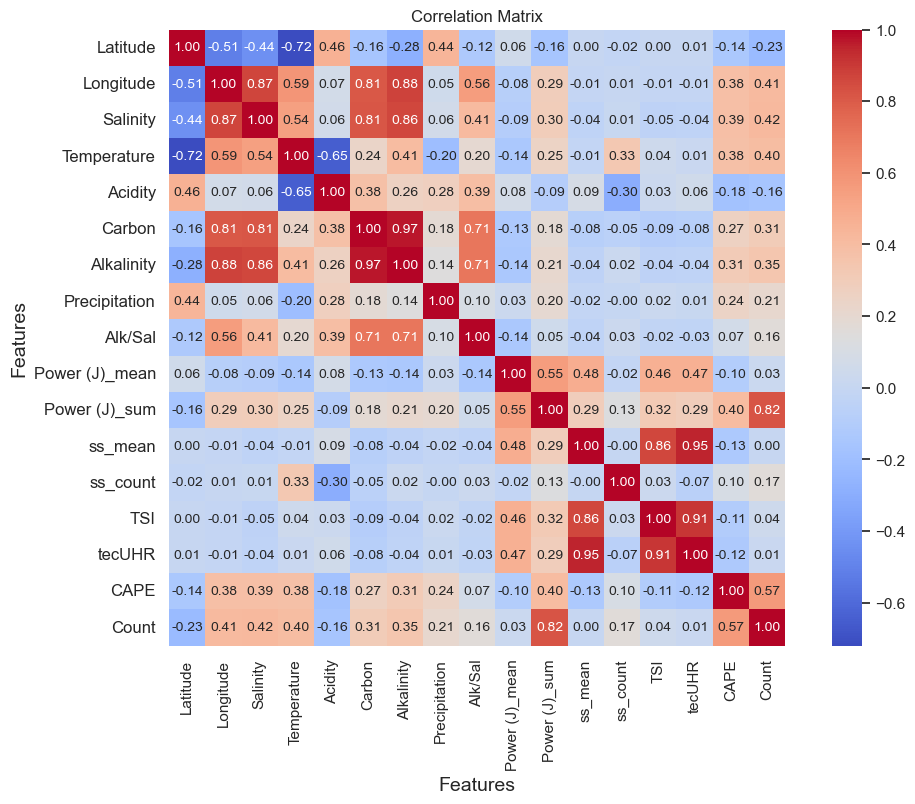

In [27]:
# Calculate correlation matrix using Spearman method
corr = df.corr(method='spearman')

# Create a mask for values between -0.3 and 0.3
mask = np.logical_and(corr >= -0.3, corr <= 0.3)

# Plot heatmap of correlation matrix with non-overlapping text
sns.set(rc={'figure.figsize':(12,8)}) # adjust figure size

# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'size':10}, square=True)

# Add title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Features', fontsize = 14)
plt.yticks(fontsize=12)
plt.ylabel('Features', fontsize = 14)
plt.yticks(fontsize=12)

plt.show()

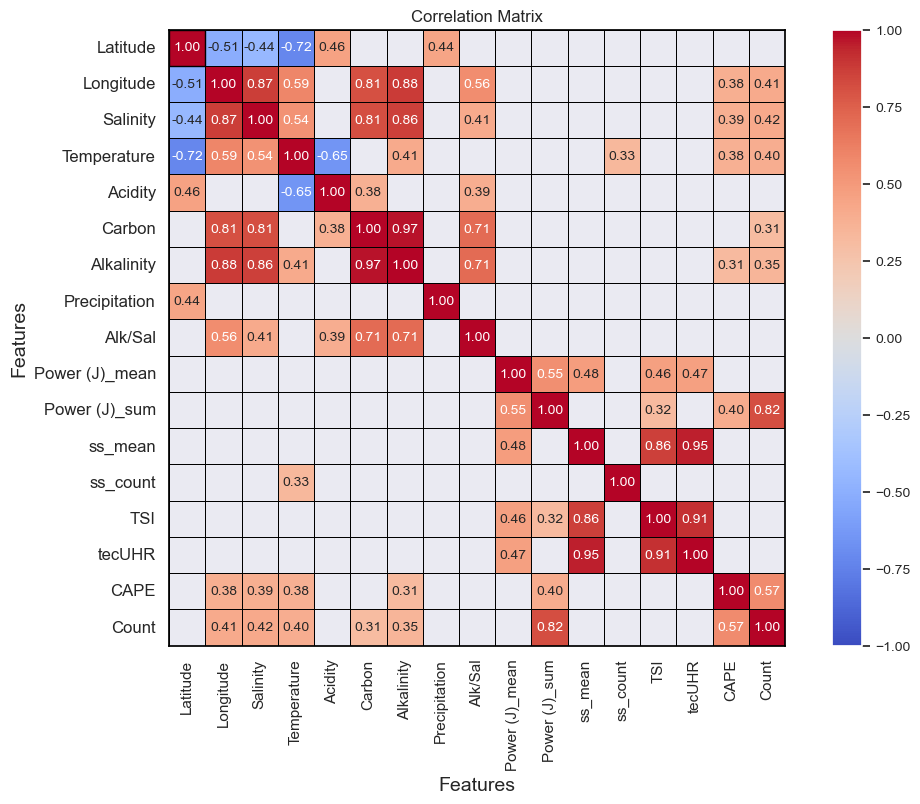

In [28]:
# Calculate correlation matrix using Spearman method
corr = df.corr(method='spearman')

# Create a mask for values between -0.3 and 0.3
mask = np.logical_and(corr >= -0.3, corr <= 0.3)

# Create heatmap plot with mask
sns.set(rc={'figure.figsize':(12,8)}) # adjust figure size

# Plot heatmap of correlation matrix
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'size':10}, mask=mask, cbar=False, vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='black')

# Adjust size of squares
ax.set_aspect('equal')

# Add title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Features', fontsize = 14)
plt.yticks(fontsize=12)
plt.ylabel('Features', fontsize = 14)
plt.yticks(fontsize=12)

# Add black lines around the plot
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_edgecolor('black')

# Add black line around the figure
plt.gca().add_artist(Rectangle((0, 0), 1, 1, color='black', fill=None, lw=1))

# Add colorbar
mappable = ax.collections[0] if ax else None
if mappable:
    cbar = plt.colorbar(mappable)
    cbar.ax.tick_params(labelsize=10)

plt.show()


spearman correlation of df_chem

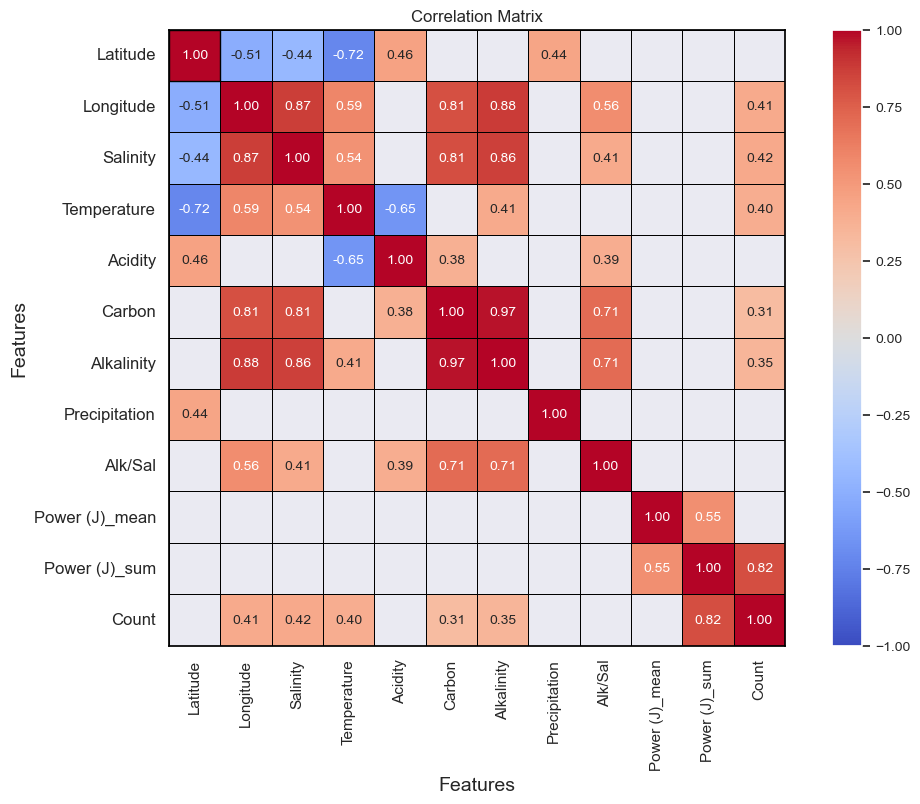

In [29]:
# Calculate correlation matrix using Spearman method
corr = df_chem.corr(method='spearman')


# Create a mask for values between -0.3 and 0.3
mask = np.logical_and(corr >= -0.3, corr <= 0.3)

# Create heatmap plot with mask
sns.set(rc={'figure.figsize':(12,8)}) # adjust figure size

# Plot heatmap of correlation matrix
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'size':10}, mask=mask, cbar=False, vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='black')

# Adjust size of squares
ax.set_aspect('equal')

# Add title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Features', fontsize = 14)
plt.yticks(fontsize=12)
plt.ylabel('Features', fontsize = 14)
plt.yticks(fontsize=12)

# Add black lines around the plot
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_edgecolor('black')

# Add black line around the figure
plt.gca().add_artist(Rectangle((0, 0), 1, 1, color='black', fill=None, lw=1))

# Add colorbar
mappable = ax.collections[0] if ax else None
if mappable:
    cbar = plt.colorbar(mappable)
    cbar.ax.tick_params(labelsize=10)

plt.show()


spearman correlation on df_sun

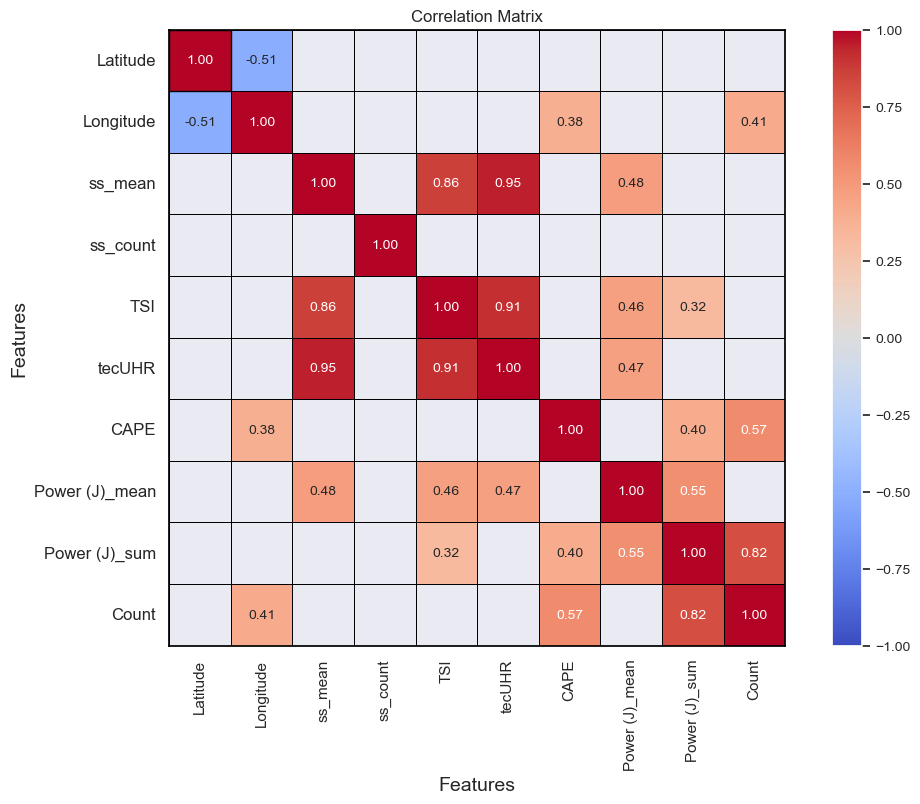

In [30]:

# Calculate correlation matrix using Spearman method
corr = df_sun.corr(method='spearman')

# Create a mask for values between -0.3 and 0.3
mask = np.logical_and(corr >= -0.3, corr <= 0.3)

# Create heatmap plot with mask
sns.set(rc={'figure.figsize':(12,8)}) # adjust figure size

# Plot heatmap of correlation matrix
ax = sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', annot_kws={'size':10}, mask=mask, cbar=False, vmin=-1, vmax=1, center=0, linewidths=0.5, linecolor='black')

# Adjust size of squares
ax.set_aspect('equal')

# Add title and axis labels
plt.title('Correlation Matrix')
plt.xlabel('Features', fontsize = 14)
plt.yticks(fontsize=12)
plt.ylabel('Features', fontsize = 14)
plt.yticks(fontsize=12)

# Add black lines around the plot
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_edgecolor('black')

# Add black line around the figure
plt.gca().add_artist(Rectangle((0, 0), 1, 1, color='black', fill=None, lw=1))

# Add colorbar
mappable = ax.collections[0] if ax else None
if mappable:
    cbar = plt.colorbar(mappable)
    cbar.ax.tick_params(labelsize=10)

plt.show()
